# Análise Preliminar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
dfMenssagens = pd.read_csv('DadosBrutosMessages (1).csv', sep=';')
dfEventos = pd.read_csv('DadosBrutosEventTracks (3).csv', sep=';')

In [3]:
dfMenssagens.sample(5)

,MessageSequentialID,StorageDate,FromIdentity,ToIdentity,Message,MessageOriginator
7445,186703,2018-02-06 21:48:13.28 -02:00,carnabelo@msging.net,1648883331824659@messenger.gw.msging.net,Vem pra folia boa!!! 🎉 \nTe espero lá..,Bot
7560,187604,2018-02-06 22:37:23.27 -02:00,1775489765818948@messenger.gw.msging.net,carnabelo@msging.net,📍 Mais próximo,User
31829,400705,2018-02-14 09:24:54.81 -02:00,carnabelo@msging.net,1780320418654063@messenger.gw.msging.net,Separei uma playlist com as músicas que bombar...,Bot
20282,309658,2018-02-11 10:50:48.01 -02:00,carnabelo@msging.net,2293878317305005@messenger.gw.msging.net,A concentração do Funk You vai ser na 👉 Avenid...,Bot
20564,311373,2018-02-11 11:54:44.55 -02:00,2066711423340867@messenger.gw.msging.net,carnabelo@msging.net,11/02/2018,User


In [4]:
dfMenssagens.isnull().sum()

MessageSequentialID    0
StorageDate            0
FromIdentity           0
ToIdentity             0
Message                0
MessageOriginator      0
dtype: int64

In [5]:
dfEventos.isnull().sum()

EventTrackSequentialID    0
OwnerIdentity             0
StorageDate               0
Category                  0
Action                    0
dtype: int64

In [6]:
dfMenssagens.describe()

,MessageSequentialID
count,33766.000000
mean,269795.489635
std,97204.445879
min,73719.000000
25%,203078.500000
50%,284831.000000
75%,347065.250000
max,651751.000000


In [7]:
dfEventos.describe()

,EventTrackSequentialID
count,52900.000000
mean,35369.931399
std,17259.304792
min,100.000000
25%,23309.750000
50%,36534.500000
75%,49759.250000
max,62984.000000


# Data Cleaning

## Dados Duplicados

In [8]:
dfMenssagens.drop('MessageSequentialID', axis = 1).duplicated().sum()

0

In [9]:
dfEventos.drop('EventTrackSequentialID', axis = 1).duplicated().sum()

1

In [10]:
dfEventos[dfEventos.drop('EventTrackSequentialID', axis = 1).duplicated()]

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
43503,53588,carnabelo@msging.net,2018-02-13 08:58:51.80 -02:00,Flow,API - Carrossel blocos - Agenda


In [11]:
dfEventos[(dfEventos.Category=='Flow') & (dfEventos.StorageDate=='2018-02-13 08:58:51.80 -02:00')]

,EventTrackSequentialID,OwnerIdentity,StorageDate,Category,Action
43502,53587,carnabelo@msging.net,2018-02-13 08:58:51.80 -02:00,Flow,API - Carrossel blocos - Agenda
43503,53588,carnabelo@msging.net,2018-02-13 08:58:51.80 -02:00,Flow,API - Carrossel blocos - Agenda


## Indexes

In [12]:
dfEventos = dfEventos.set_index('EventTrackSequentialID')
dfMenssagens = dfMenssagens.set_index('MessageSequentialID')

In [13]:
dfEventos.index

Int64Index([  100,   101,   102,   103,   104,   105,   106,   107,   108,
              109,
            ...
            62975, 62976, 62977, 62978, 62979, 62980, 62981, 62982, 62983,
            62984],
           dtype='int64', name='EventTrackSequentialID', length=52900)

In [14]:
dfMenssagens.index

Int64Index([ 73719,  73722,  73723,  73726,  73729,  73730,  73732,  73735,
             73738,  73740,
            ...
            650943, 650945, 650948, 650950, 650953, 650957, 650960, 651746,
            651749, 651751],
           dtype='int64', name='MessageSequentialID', length=33766)

# Transformação de colunas

Transformarei as categorias em colunas, pois dessa forma iremos conseguir analisar a tendência durante os dias

In [15]:
dfEventos['Flow']=1
dfEventos['PesquisaBairro']=1
dfEventos['PesquisaDia']=1
dfEventos['EuVou']=1
dfEventos['ComoChegar']=1
dfEventos['Objetivo']=1
dfEventos['Ads']=1
dfEventos['PesquisaSatisfacao']=1
dfEventos['broad-Fim_Carnaval']=1
dfEventos['Enviodefoto']=1
dfEventos['CupomCabify']=1
dfEventos['broad-Chama_Sindico']=1
dfEventos['broad-chama-o-sindico']=1
dfEventos['broad-']=1
dfEventos.loc[dfEventos.Category!='Pesquisa - Bairro', 'PesquisaBairro']=0
dfEventos.loc[dfEventos.Category!='Flow', 'Flow']=0
dfEventos.loc[dfEventos.Category!='Pesquisa - Dia', 'PesquisaDia']=0
dfEventos.loc[dfEventos.Category!='Eu vou', 'EuVou']=0
dfEventos.loc[dfEventos.Category!='Como chegar', 'ComoChegar']=0
dfEventos.loc[dfEventos.Category!='Objetivo', 'Objetivo']=0
dfEventos.loc[dfEventos.Category!='Ads', 'Ads']=0
dfEventos.loc[dfEventos.Category!='broad-Pesquisa_Satisfacao', 'PesquisaSatisfacao']=0
dfEventos.loc[dfEventos.Category!='broad-Fim_Carnaval', 'broad-Fim_Carnaval']=0
dfEventos.loc[dfEventos.Category!='Envio de foto', 'Enviodefoto']=0
dfEventos.loc[dfEventos.Category!='broad-Cupom_Cabify', 'CupomCabify']=0
dfEventos.loc[dfEventos.Category!='broad-Chama_Sindico', 'broad-Chama_Sindico']=0
dfEventos.loc[dfEventos.Category!='broad-chama-o-sindico', 'broad-chama-o-sindico']=0
dfEventos.loc[dfEventos.Category!='broad-', 'broad-']=0


Como a campanha só funcionou por alguns dias, alterei as datas e coloquei apenas os dias

In [16]:
dfEventos['StorageDate'] = dfEventos['StorageDate'].str[8:10]
dfEventos.head()

,OwnerIdentity,StorageDate,Category,Action,Flow,PesquisaBairro,PesquisaDia,EuVou,ComoChegar,Objetivo,Ads,PesquisaSatisfacao,broad-Fim_Carnaval,Enviodefoto,CupomCabify,broad-Chama_Sindico,broad-chama-o-sindico,broad-
EventTrackSequentialID,,,,,,,,,,,,,,,,,,
100,carnabelo@msging.net,02,Flow,Boas vindas,1,0,0,0,0,0,0,0,0,0,0,0,0,0
101,carnabelo@msging.net,02,Flow,Objetivo - Beber,1,0,0,0,0,0,0,0,0,0,0,0,0,0
102,carnabelo@msging.net,02,Objetivo,Beber,0,0,0,0,0,1,0,0,0,0,0,0,0,0
103,carnabelo@msging.net,02,Flow,Intro,1,0,0,0,0,0,0,0,0,0,0,0,0,0
104,carnabelo@msging.net,02,Flow,Menu,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Análises

### O que os usuários buscavam no chatbot

Tive que buscar um solução para remoção dos emojis, pois estava dando erro nos gráficos, utilizei o comando abaixo

In [17]:
filter_char = lambda c: ord(c) < 256
dfMenssagens['Message'] = dfMenssagens['Message'].apply(lambda s: ''.join(filter(filter_char, s)))

Vou criar filtros para poder separar as mensagens enviadas pelo bot das mensagens do usuário e criarei 2 gráficos para idêntificar quais as 10 mensagens mais utilizadas

In [18]:
UserMs = dfMenssagens.Message[(dfMenssagens.MessageOriginator=='User')]
BotMs = dfMenssagens.Message[(dfMenssagens.MessageOriginator=='Bot')]
HotCategory = dfEventos.Category[(dfEventos.Category!='Flow')]

In [19]:
graf_userms = UserMs.value_counts().head(10).sort_values(ascending=False)

In [20]:
graf_botms = BotMs.value_counts().head(10).sort_values(ascending=False)

Text(0.5, 1.0, 'Buscas por usuário')

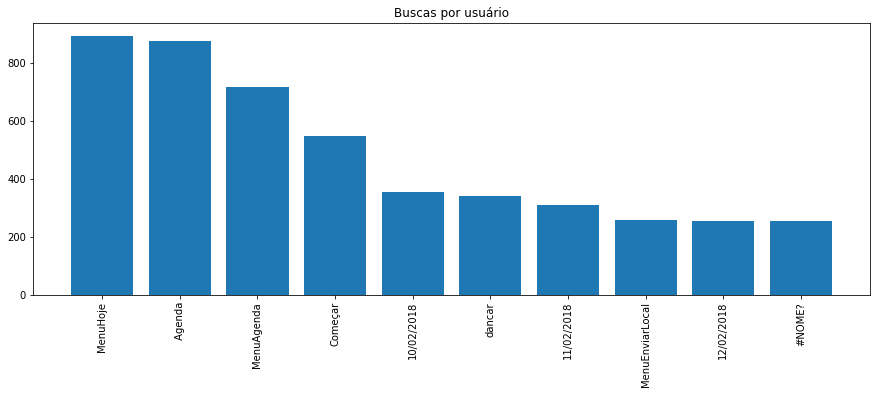

In [21]:
plt.figure(figsize=(15,5))
plt.bar(graf_userms.index, graf_userms.values)
plt.xticks(rotation=90)
plt.title('Buscas por usuário')

Como podemos observar, os usuários em sua maioria buscavam a agenda do dia, ou seja, quais blocos estariam rolando na cidade.

Text(0.5, 1.0, 'Respostas do Bot')

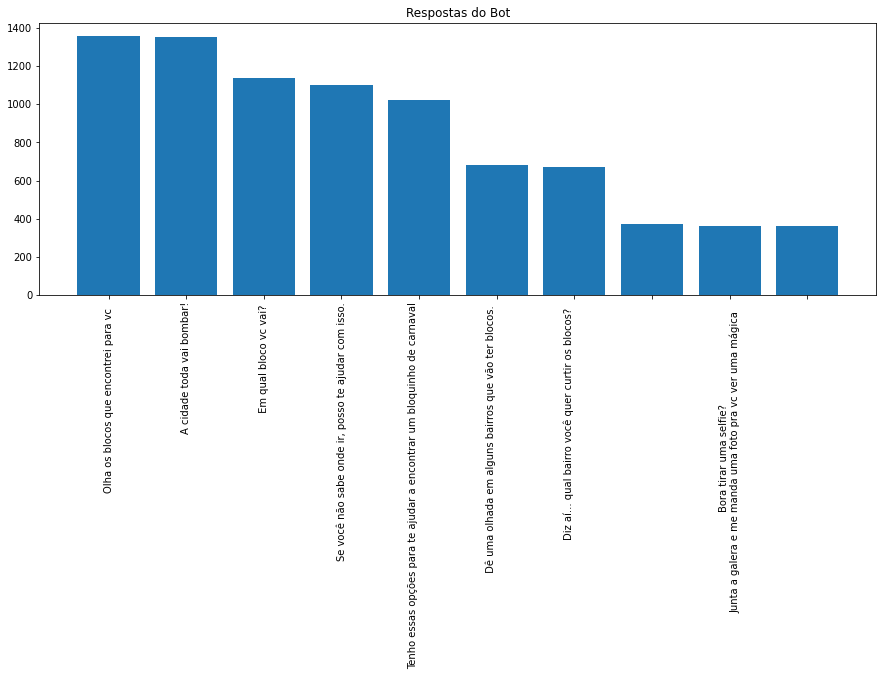

In [22]:
plt.figure(figsize=(15,5))
plt.bar(graf_botms.index, graf_botms.values)
plt.xticks(rotation=90)
plt.title('Respostas do Bot')

Vamos analisar qual eram as intenções finais dos usuários, baseado em quais eventos importantes tiveram mais acessos

Text(0.5, 1.0, 'Eventos importantes mais acessados')

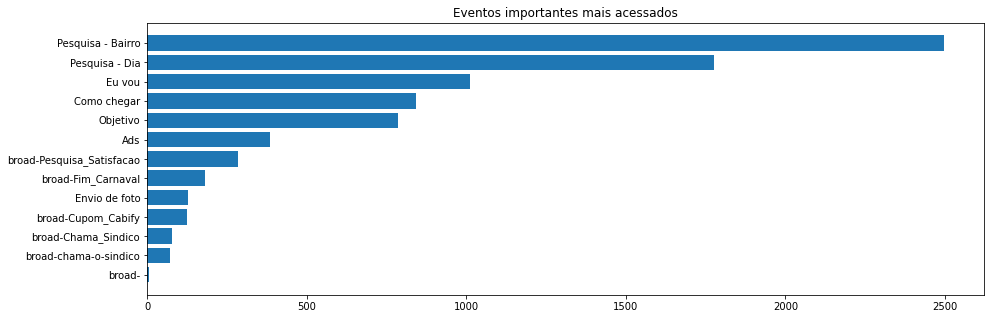

In [23]:
graf_HotCategory = HotCategory.value_counts().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.barh(graf_HotCategory.index, graf_HotCategory.values)
plt.title('Eventos importantes mais acessados')

## Quais são as tendências de comportamento?

Para entendermos as tendências do comportamento durante a semana, separei as ações que demonstravam intenção das ações de navegação 'Flow' e das ações de Ads e Pesquisa de satisfação

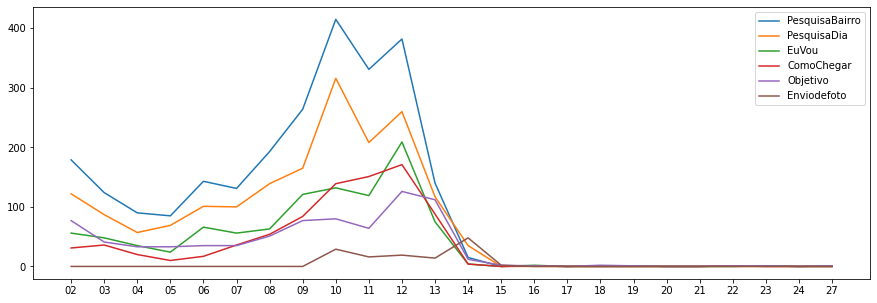

In [24]:
graf_ten = dfEventos.groupby('StorageDate').sum()
plt.figure(figsize=(15,5))
plt.plot(graf_ten.index, graf_ten.PesquisaBairro)
plt.plot(graf_ten.index, graf_ten.PesquisaDia)
plt.plot(graf_ten.index, graf_ten.EuVou)
plt.plot(graf_ten.index, graf_ten.ComoChegar)
plt.plot(graf_ten.index, graf_ten.Objetivo)
plt.plot(graf_ten.index, graf_ten.Enviodefoto)
plt.legend(['PesquisaBairro','PesquisaDia','EuVou','ComoChegar','Objetivo','Enviodefoto'])


Podemos observar que após o dia 13 tivemos uma queda no uso do chatbot, esse fato ocorreu muito provavelmente pelo fim dos blocos de carnaval. Outra situação que podemos observar que a maioria dos usuários estavam buscando a localização dos blocos, sendo correlato com a tendência que idêntificamos nas mensagens trocadas. No geral as pessoas entravam no fluxo buscando encontrar quais blocos teriam no dia e sua ação final era idêntificar onde esses blocos estavam.

## O que te chamou atenção com relação a utilização da plataforma pelos usuários?

Vamos investigar quantas ações são necessárias até ser gerada uma ação valiosa

In [25]:
dfEventos.Category.count()

52900

In [26]:
HotCategory.count()

8173

Aproximadamente está sendo necessário 5,5 ações de navegação para gerar uma ação valiosa, podemos verificar essa tendência no gráfico durante a semana

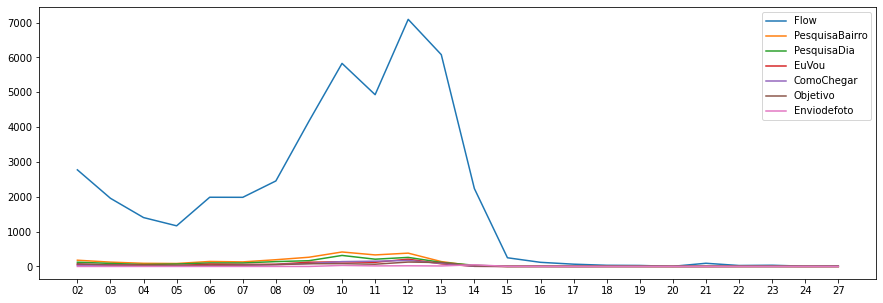

In [27]:
plt.figure(figsize=(15,5))
plt.plot(graf_ten.index, graf_ten.Flow)
plt.plot(graf_ten.index, graf_ten.PesquisaBairro)
plt.plot(graf_ten.index, graf_ten.PesquisaDia)
plt.plot(graf_ten.index, graf_ten.EuVou)
plt.plot(graf_ten.index, graf_ten.ComoChegar)
plt.plot(graf_ten.index, graf_ten.Objetivo)
plt.plot(graf_ten.index, graf_ten.Enviodefoto)
plt.legend(['Flow','PesquisaBairro','PesquisaDia','EuVou','ComoChegar','Objetivo','Enviodefoto'])


A quantidade de ações de navegação parece estar muito alta

## Aponte no mínimo 3 insights utilizando dados que podem gerar melhorias ou evoluções ao Chatbot

1- Como podemos observar anteriormente, necessitamos de 5,5 ações de navegação para gerar uma ação valiosa, foi idêntificado também que a maioria das buscas feitas são para saber os blocos que se tem no dia. Podemos considerar a hipótese de que antecipar a necessidade do usuário na mensagem, já utilizando o botão "Ver blocos de hoje" pode fazer com que ele tenha sua resposta mais rápida e não acabe abandonando o chat.

2- Verificando os dados, podemos notar que em relação as outras ações importantes o AD do Cabify teve poucas conversões.

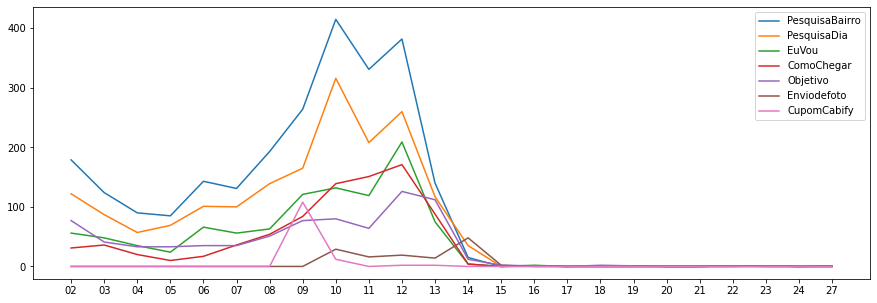

In [28]:
plt.figure(figsize=(15,5))
plt.plot(graf_ten.index, graf_ten.PesquisaBairro)
plt.plot(graf_ten.index, graf_ten.PesquisaDia)
plt.plot(graf_ten.index, graf_ten.EuVou)
plt.plot(graf_ten.index, graf_ten.ComoChegar)
plt.plot(graf_ten.index, graf_ten.Objetivo)
plt.plot(graf_ten.index, graf_ten.Enviodefoto)
plt.plot(graf_ten.index, graf_ten.CupomCabify)
plt.legend(['PesquisaBairro','PesquisaDia','EuVou','ComoChegar','Objetivo','Enviodefoto','CupomCabify'])

Podemos utilizar o AD do cabify logo após a pessoa ter encontrado o bloco. "Agora que você já achou seu bloquinho, vá em segurança com a Cabify 20% de desconto...", dessa forma, ela tem acesso a promoção na hora em que ela tem a intenção de sair, sendo assim, além de levar as pessoas até os blocos iremos aquecer a economia local

3- Outro ponto que podemos melhorar é a quantidade de feedback recebido

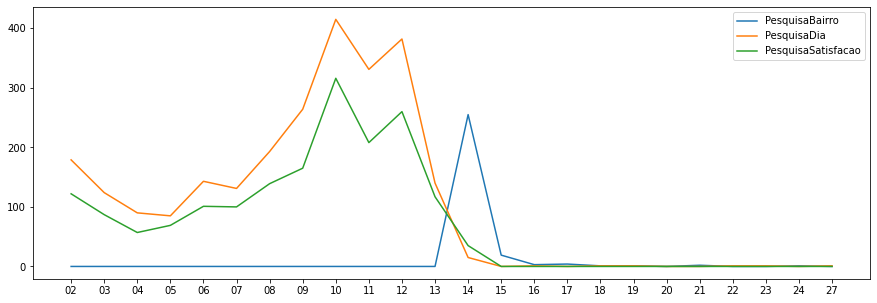

In [30]:
plt.figure(figsize=(15,5))
plt.plot(graf_ten.index, graf_ten.PesquisaSatisfacao)
plt.plot(graf_ten.index, graf_ten.PesquisaBairro)
plt.plot(graf_ten.index, graf_ten.PesquisaDia)
plt.legend(['PesquisaBairro','PesquisaDia','PesquisaSatisfacao']) 

Analisando, vemos que a pesquisa de satisfação foi feita em um dos útlimos dias, seria interessante testar o envio da pesquisa de satisfação no mesmo dia, logo após o usuário ter feito uma ação importante, exemplo sinalizar "Eu Vou" em um bloco, ou após algumas horas sem usar o chat.